In [1]:
import pandas as pd
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url="https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART"

names = []
reviews = []

pid = url.split('?')[1].split('&')[0].split('=')[1]
lid = 'LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART'

# loop through all the pages of the product reviews(i am iterating through 100 pages)
for i in range(1, 176):
    # construct the URL for the current page of reviews
    page_url = f"https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid={pid}&lid={lid}&page={i}"
    #"https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/p/itm65f2925757d94?pid={pid}&lid={lid}&page={i}"
    response = requests.get(page_url)
    print(f"Requesting page {i}, URL: {page_url}, Status Code: {response.status_code}")
    soup = BeautifulSoup(response.content, "html.parser")

    
    # extract the names and reviews for the current page
    for item in soup.find_all("p", class_="_2sc7ZR _2V5EHH"):
        names.append(item.get_text().strip())
    
    for item in soup.find_all("div",class_="t-ZTKy"):
        reviews.append(item.get_text().strip())

# create a list of tuples containing the data for each row of the DataFrame
data = list(zip(names, reviews))

# create a pandas DataFrame from the list of tuples
df3 = pd.DataFrame(data, columns=["Name","Reviews"])

# print the DataFrame
print(df3)


Requesting page 1, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=1, Status Code: 200
Requesting page 2, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=2, Status Code: 200
Requesting page 3, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=3, Status Code: 200
Requesting page 4, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=4, Statu

Requesting page 34, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=34, Status Code: 200
Requesting page 35, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=35, Status Code: 200
Requesting page 36, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=36, Status Code: 200
Requesting page 37, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=3

Requesting page 67, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=67, Status Code: 200
Requesting page 68, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=68, Status Code: 200
Requesting page 69, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=69, Status Code: 200
Requesting page 70, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=7

Requesting page 100, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=100, Status Code: 200
Requesting page 101, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=101, Status Code: 200
Requesting page 102, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=102, Status Code: 200
Requesting page 103, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART

Requesting page 132, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=132, Status Code: 200
Requesting page 133, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=133, Status Code: 200
Requesting page 134, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=134, Status Code: 200
Requesting page 135, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART

Requesting page 164, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=164, Status Code: 200
Requesting page 165, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=165, Status Code: 200
Requesting page 166, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART&page=166, Status Code: 200
Requesting page 167, URL: https://www.flipkart.com/vu-gloled-108-cm-43-inch-ultra-hd-4k-led-smart-google-tv-dj-subwoofer-84w/product-reviews/itm65f2925757d94?pid=TVSGJKC9TUSZ2DHS&lid=LSTTVSGJKC9TUSZ2DHSYRCHBF&marketplace=FLIPKART

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.flipkart.com/mi-11x-cosmic-black-128-gb/p/itm005c4d8bec540?pid=MOBG36HS3TH4YR3G&lid=LSTMOBG36HS3TH4YR3G7QOO9J&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_5&otracker=nmenu_sub_Electronics_0_Mi&fm=organic&iid=840282c0-b7fb-4575-accb-da31d949a6db.MOBG36HS3TH4YR3G.SEARCH&ppt=dynamic&ppn=dynamic&ssid=0wviau3sfk0000001681120869284"
names = []
reviews = []

# extract the pid and lid query parameters from the original URL
pid = url.split('?')[1].split('&')[0].split('=')[1]
lid = url.split('?')[1].split('&')[1].split('=')[1]

# loop through all the pages of the product reviews (100 pages in this example)
for i in range(1, 101):
    # construct the URL for the current page of reviews
    page_url = f"https://www.flipkart.com/ratings/product?pid={pid}&lid={lid}&page={i}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, "html.parser")

    # extract the names and reviews for the current page
    for item in soup.find_all("p", class_="_2sc7ZR _2V5EHH"):
        names.append(item.get_text().strip())

    for item in soup.find_all("div", class_="t-ZTKy"):
        reviews.append(item.get_text().strip())

# create a list of tuples containing the data for each row of the DataFrame
data = list(zip(names, reviews))

# create a pandas DataFrame from the list of tuples
df = pd.DataFrame(data, columns=["Name", "Reviews"])

# print the DataFrame
print(df)


In [3]:
# importing into csv file ----file will be strobed in the current working directory
df3.to_csv("VuTV_FacebookReviews.csv",index=False)

In [ ]:
""""
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.flipkart.com/.../product-reviews/..."
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

names = []
reviews = []
readmore_links = []

for item in soup.find_all("div", {"class": "_2kHMtA"}):
    names.append(item.find("p", {"class": "_2sc7ZR _2V5EHH"}).get_text().strip())
    reviews.append(item.find("div", {"class": "t-ZTKy"}).get_text().strip())
    readmore_links.append(item.find("a", {"class": "_1fQZEK"}).get("href"))

full_reviews = []

for link in readmore_links:
    response = requests.get("https://www.flipkart.com" + link)
    soup = BeautifulSoup(response.content, "html.parser")
    full_reviews.append(soup.find("div", {"class": "_1YokD2 _3Mn1Gg col-9-12"}).get_text().strip())

# create a list of tuples containing the data for each row of the DataFrame
data = list(zip(names, reviews, full_reviews))

# create a pandas DataFrame from the list of tuples
df = pd.DataFrame(data, columns=["Name", "Short Review", "Full Review"])

# save the DataFrame to a CSV file
df.to_csv("reviews.csv", index=False)
""""


In [4]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [5]:
df3['Reviews']=df3['Reviews'].apply(clean_text)

In [6]:
df3.head()

,Name,Reviews
0,Krithika,hi everyone i would like to share my thoughts ...
1,Dany Chintapalli,at first impression the tv is excellent with g...
2,Flipkart Customer,best tv i ever seen within the budget i just l...
3,Kullay,superb tv at this price range value for money...
4,Kirankumar u Kiran,tv picture quality is very good features g...


### Tokenization,Stopwords remove,Pos_tagging,Stemming

In [7]:

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
                    newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


In [8]:
df3['POStagged'] = df3['Reviews'].apply(token_stop_pos)
df3.head()


,Name,Reviews,POStagged
0,Krithika,hi everyone i would like to share my thoughts ...,"[(hi, n), (everyone, n), (would, None), (like,..."
1,Dany Chintapalli,at first impression the tv is excellent with g...,"[(first, a), (impression, n), (tv, n), (excell..."
2,Flipkart Customer,best tv i ever seen within the budget i just l...,"[(best, a), (tv, n), (ever, r), (seen, v), (wi..."
3,Kullay,superb tv at this price range value for money...,"[(superb, a), (tv, n), (price, n), (range, n),..."
4,Kirankumar u Kiran,tv picture quality is very good features g...,"[(tv, n), (picture, n), (quality, n), (good, a..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [10]:
df3['Lemma'] = df3['POStagged'].apply(lemmatize)

In [11]:
df3[['Reviews','Lemma']]

,Reviews,Lemma
0,hi everyone i would like to share my thoughts ...,hi everyone would like share thought may hel...
1,at first impression the tv is excellent with g...,first impression tv excellent good picture m...
2,best tv i ever seen within the budget i just l...,best tv ever see within budget love sound ou...
3,superb tv at this price range value for money...,superb tv price range value money picture cl...
4,tv picture quality is very good features g...,tv picture quality good feature good look be...
...,...,...
149,value for money and awesome tv read more,value money awesome tv read
150,picture quality is great for online contentuse...,picture quality great online contentuser int...
151,ultimate experienceread more,ultimate experienceread
152,tv is good for the price picture quality is a...,tv good price picture quality also good come...


### Sentiment Analysis using TextBlob:

In [12]:
from textblob import TextBlob
# func to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# func to get Polartity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# Func to get score
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [13]:
df3['Subjectivity'] = df3['Lemma'].apply(getSubjectivity) 
df3['Polarity'] = df3['Lemma'].apply(getPolarity) 
df3['Analysis'] = df3['Polarity'].apply(analysis)
df3.head(15)

,Name,Reviews,POStagged,Lemma,Subjectivity,Polarity,Analysis
0,Krithika,hi everyone i would like to share my thoughts ...,"[(hi, n), (everyone, n), (would, None), (like,...",hi everyone would like share thought may hel...,0.469444,0.044444,Positive
1,Dany Chintapalli,at first impression the tv is excellent with g...,"[(first, a), (impression, n), (tv, n), (excell...",first impression tv excellent good picture m...,0.526667,0.670000,Positive
2,Flipkart Customer,best tv i ever seen within the budget i just l...,"[(best, a), (tv, n), (ever, r), (seen, v), (wi...",best tv ever see within budget love sound ou...,0.385714,0.442857,Positive
3,Kullay,superb tv at this price range value for money...,"[(superb, a), (tv, n), (price, n), (range, n),...",superb tv price range value money picture cl...,0.610256,0.569872,Positive
4,Kirankumar u Kiran,tv picture quality is very good features g...,"[(tv, n), (picture, n), (quality, n), (good, a...",tv picture quality good feature good look be...,0.666667,0.716667,Positive
5,Flipkart Customer,its long term review can say i bought it on th...,"[(long, a), (term, n), (review, n), (say, v), ...",long term review say buy first day release p...,0.440476,0.321429,Positive
6,SUNNY BEAST GAMING,the product quality was very gud and the pictu...,"[(product, n), (quality, n), (gud, a), (pictur...",product quality gud picture quality gud love...,0.671429,0.285714,Positive
7,Flipkart Customer,the quality of this tv is goodand sound is als...,"[(quality, n), (tv, n), (goodand, a), (sound, ...",quality tv goodand sound also excellent also...,0.760000,0.760000,Positive
8,Syed Mateen,awesome picture quality and sound everything i...,"[(awesome, a), (picture, n), (quality, n), (so...",awesome picture quality sound everything per...,0.560000,0.560000,Positive
9,Prabhu Prabhu,i purchased inches tv so very nice picture qu...,"[(purchased, v), (inches, n), (tv, n), (nice, ...",purchase inch tv nice picture quality excell...,0.850000,0.650000,Positive


In [14]:
review_count=df3.Analysis.value_counts()
review_count

Positive    143
Neutral      10
Negative      1
Name: Analysis, dtype: int64

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['VaderSentiment'] = df3['Lemma'].apply(vadersentimentanalysis)


# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
#tweets['VadetAnalysis']=tweets['']
df3['VaderAnalysis'] = df3['VaderSentiment'].apply(vader_analysis)
df3.head()

,Name,Reviews,POStagged,Lemma,Subjectivity,Polarity,Analysis,VaderSentiment,VaderAnalysis
0,Krithika,hi everyone i would like to share my thoughts ...,"[(hi, n), (everyone, n), (would, None), (like,...",hi everyone would like share thought may hel...,0.469444,0.044444,Positive,0.9022,Positive
1,Dany Chintapalli,at first impression the tv is excellent with g...,"[(first, a), (impression, n), (tv, n), (excell...",first impression tv excellent good picture m...,0.526667,0.670000,Positive,0.9136,Positive
2,Flipkart Customer,best tv i ever seen within the budget i just l...,"[(best, a), (tv, n), (ever, r), (seen, v), (wi...",best tv ever see within budget love sound ou...,0.385714,0.442857,Positive,0.9217,Positive
3,Kullay,superb tv at this price range value for money...,"[(superb, a), (tv, n), (price, n), (range, n),...",superb tv price range value money picture cl...,0.610256,0.569872,Positive,0.9866,Positive
4,Kirankumar u Kiran,tv picture quality is very good features g...,"[(tv, n), (picture, n), (quality, n), (good, a...",tv picture quality good feature good look be...,0.666667,0.716667,Positive,0.9699,Positive


In [18]:
vader_count=df3.VaderAnalysis.value_counts()
vader_count

Positive    133
Neutral      21
Name: VaderAnalysis, dtype: int64

In [20]:
clean_reviews=' '.join(df3['Lemma'])
clean_reviews

'  hi everyone would like share thought may help already buy relieve stress confuse buy glo lead buy inch tv first day sale find blooming common led tv satisfaction make replacement received one mild bloom edge would say completely normal dont stress also dont worry deep black suggest wayread   first impression tv excellent good picture mind blowing sound driver price segment best todayread   best tv ever see within budget love sound output vu glo lead inch premium tv comparison tv take guysbest class every penny worth many thanks flipkart fast installation serviceread   superb tv price range value money picture clarity awesome hd picture upscaling also much good good adjust mode accordingly well go sound bar good quality connectivity also fast didnt face issue ui o also easy smooth user friendly overall satisfied purchase regret find best tv price range go wiread   tv picture quality good feature good look best price range good amazing tv buy nice 👌read   long term review say buy firs

In [21]:
import spacy
nlp=spacy.load('en_core_web_sm')
one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

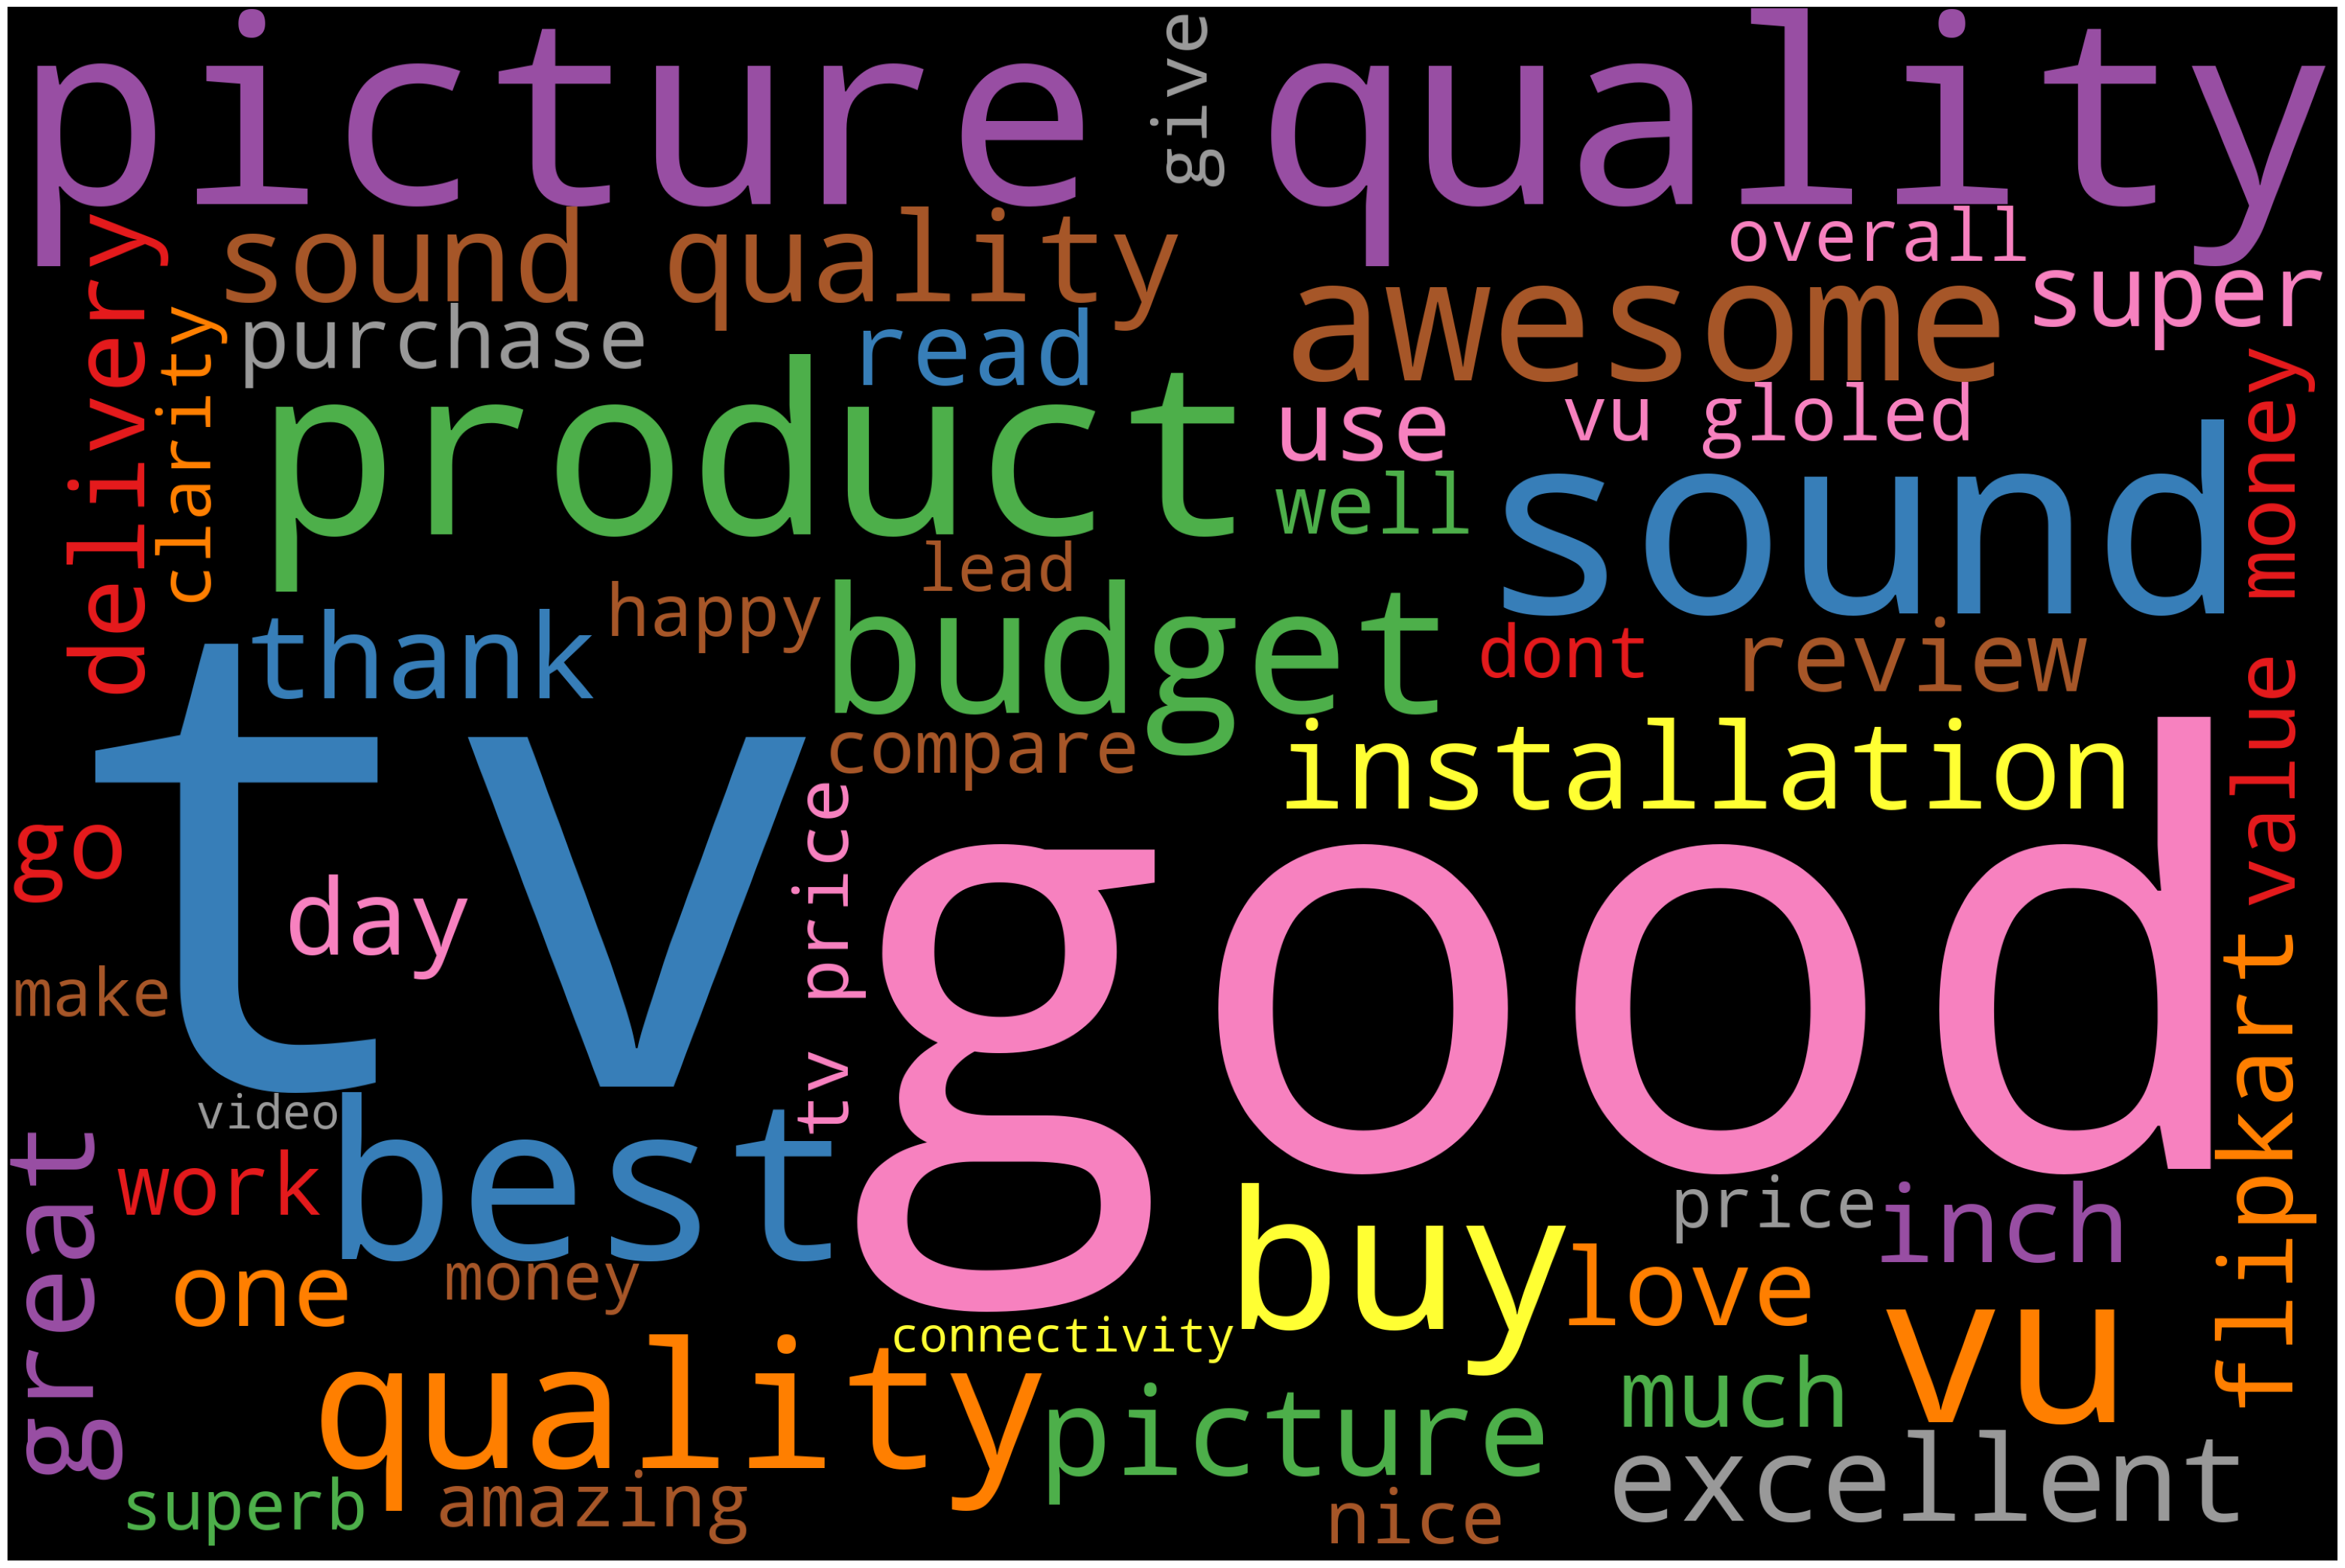

In [23]:
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1').generate(clean_reviews)
plot_cloud(wordcloud)

In [24]:
df = df3[['Reviews','Lemma', 'Analysis']].copy()

In [25]:
df.head()

,Reviews,Lemma,Analysis
0,hi everyone i would like to share my thoughts ...,hi everyone would like share thought may hel...,Positive
1,at first impression the tv is excellent with g...,first impression tv excellent good picture m...,Positive
2,best tv i ever seen within the budget i just l...,best tv ever see within budget love sound ou...,Positive
3,superb tv at this price range value for money...,superb tv price range value money picture cl...,Positive
4,tv picture quality is very good features g...,tv picture quality good feature good look be...,Positive


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Analysis']=le.fit_transform(df['Analysis'])
print(df["Analysis"].unique())

[2 1 0]


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features = 500)
X =vectorizer.fit_transform(df['Lemma'])
print(vectorizer.get_feature_names())


['adjust', 'adjustment', 'affordable', 'already', 'also', 'also good', 'also great', 'always', 'amaze', 'amazing', 'amazing picture', 'amazing picture quality', 'android', 'angel', 'angle', 'another', 'app', 'apps', 'apps support', 'assistant', 'audio', 'available', 'awesome', 'awesome picture', 'awesome product', 'awesome product good', 'awesome tv', 'awesomeread', 'background', 'bar', 'bass', 'best', 'best budget', 'best budget tv', 'best picture', 'best picture quality', 'best tv', 'best tv price', 'big', 'big billion', 'big billion day', 'billion', 'billion day', 'bit', 'black', 'blue', 'brand', 'brandread', 'bright', 'brightness', 'budget', 'budget tv', 'budget tv range', 'budget tv sound', 'budgetread', 'build', 'build quality', 'buy', 'buy glo', 'buy glo lead', 'buy inch', 'buy tv', 'buy vu', 'buy vu tv', 'buy wont', 'buy wont regretread', 'buyread', 'cable', 'cable good', 'calibration', 'cant', 'channel', 'choice', 'cinema', 'clarity', 'clarity picture', 'class', 'clear', 'clea

In [28]:
print(X.toarray())

[[0.         0.         0.         ... 0.32063435 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
y=df['Analysis']
print(y.shape)

(154,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = LogisticRegression()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.9230769230769231

 clasification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.92      1.00      0.96        36

    accuracy                           0.92        39
   macro avg       0.46      0.50      0.48        39
weighted avg       0.85      0.92      0.89        39


 confusion matrix:
 [[ 0  3]
 [ 0 36]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.8974358974358975

 clasification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.92      0.97      0.95        36

    accuracy                           0.90        39
   macro avg       0.46      0.49      0.47        39
weighted avg       0.85      0.90      0.87        39


 confusion matrix:
 [[ 0  3]
 [ 1 35]]


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.97      0.97      0.97        36

    accuracy                           0.95        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.95      0.95      0.95        39


 confusion matrix:
 [[ 2  1]
 [ 1 35]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.97      0.97      0.97        36

    accuracy                           0.95        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.95      0.95      0.95        39


 confusion matrix:
 [[ 2  1]
 [ 1 35]]


In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.8974358974358975

 clasification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.92      0.97      0.95        36

    accuracy                           0.90        39
   macro avg       0.46      0.49      0.47        39
weighted avg       0.85      0.90      0.87        39


 confusion matrix:
 [[ 0  3]
 [ 1 35]]


In [40]:
# Random Forest classifer gives the good accuracy